# MATH80629

# Semaine \#5 - Réseaux de neurones - Exercices

Ce tutoriel explore les réseaux de neurones.

In [1]:
import numpy as np

# Pour obtenir le fichier utils.py
!wget https://raw.githubusercontent.com/lcharlin/80-629/master/week5-NeuralNetworks/utils.py

--2021-09-27 21:53:07--  https://raw.githubusercontent.com/lcharlin/80-629/master/week5-NeuralNetworks/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11201 (11K) [text/plain]
Saving to: ‘utils.py.3’

utils.py.3          100%[===================>]  10.94K  --.-KB/s    in 0.002s  

2021-09-27 21:53:07 (5.13 MB/s) - ‘utils.py.3’ saved [11201/11201]



## Un tout petit réseau pour se faire la main

Nous allons utiliser ce réseau de neurones pour classifier des données:

<img src="images/nn.png" width="700">

avec $\sigma$ la fonction sigmoïde:

$$
    \sigma(x) = \frac{1}{1+ e^{-x}}
$$

Pour l'instant, nous n'allons pas entraîner le modèle. Nous allons simplement calculer ses sorties avec des poids (paramètres) fixes.

### Question 1

Utilisez ces paramètres du réseau de neurones: 

\begin{aligned}
& w_1 = -5 & w_2 = 10 && w_3 = 5 \\
& w_4 = -10 & w_5 = 20 && w_6 = 20 \\
& b_1 = 25 & b_2 = 40 && b_3 = -30 
\end{aligned}

Pour obtenir une prédiction (o et cible) pour les données (x) suivantes :


 | x1 | x2 | o | cible |
 |-------|-------|-----|-------|
 | 4     | -4    |     |       |
 |-4     | 4     |     |       |
 | -4    | -4    |     |       |
 | 4     | 4     |     |       |

Vous pouvez utiliser ces fonctions pour évaluer les sorties du réseau :

In [2]:
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))


def nn1(x1, x2, w1, w2, w3, w4, w5, w6, b1, b2, b3):
    h1 = sigmoid(w1*x1 + w3*x2 + b1)
    h2 = sigmoid(w2*x1 + w4*x2 + b2)
    o = sigmoid(w5*h1 + w6*h2 + b3)
    return o
    

In [3]:
w1 = ...; w2 = ...; w3 = ...; w4 = ...; w5 = ...; w6 = ...
b1 = ...; b2 = ...; b3 = ...

for (x1, x2) in [(4, -4), (-4, 4), (-4, -4), (4, 4)]:
    o = nn1(...)
    
    # La règle de décision classifie les valeurs 
    #  prédites plus grandes que 0.5 comme venant de la classee 1
    #  et les autres (<=0.5) comme venant de la classe 0.
    if o > 0.5:
        label = 1 
    else:
        label = 0
    print('x1:%d  x2:%d  output:%.2f, label:%d'%(x1, x2, o, label))

x1:4  x2:-4  output:0.00, label:0
x1:-4  x2:4  output:0.00, label:0
x1:-4  x2:-4  output:1.00, label:1
x1:4  x2:4  output:1.00, label:1


## Trouvons de bons paramètres à notre réseau

Évidemment en pratique nous aimerions entraîner les poids de notre réseau à partir d'un ensemble d'entraînement. 

Pour ces exemples, nous nous concentrons sur la classification binaire. 

---

Comme d'habitude, on commence par charger un jeu de données (de classification):

In [4]:
from utils import load_data, plot_boundaries, plot_data # on a écrit quelques fonctions 
X_train, y_train, X_test, y_test = load_data()          # pour obtenir des données

Les données sont en deux dimensions et nous pouvons les visualiser avec la fonction `plot_data` :

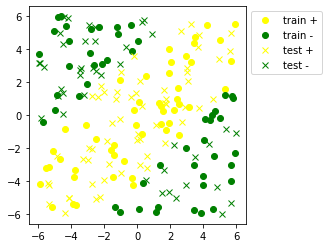

In [5]:
plot_data(X_train, y_train, X_test, y_test)

Ces données ne sont pas linéairement séparables (à tout le moins, il faudrait combiner la décision de deux modèles linéaires). 

Le but du reste des exercices est d'apprendre des paramètres du réseau de neurones qui nous permettront de correctement discriminer les exemples des deux classes. 

Rappel: Que veut-on dire par *apprendre des paramètres*? Notre réseau de neurones à 9 paramètres incluant 3 interceptes ($w_1, \ldots, w_6, b_1, b_2, b_3$). Chaque ensemble de valeurs des poids mène à une classificateur différent. Nous voulons donc trouver les valeurs qui nous permettront de classifier le plus justement possible nos données.

Débutons par explorer comme les différents paramètres affectent la classification. Pour un ensemble de paramètres, la fonction `plot_boundaries` permet de visualiser les frontières de décisions ainsi que les prédictions du classificateur.

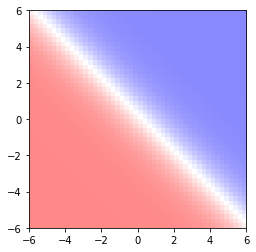

In [6]:
w1 = 1; w2 = 1; w3 = 1; w4 = 1; w5 = 1; w6 = 1
b1 = 0; b2 = 0; b3 = -1
plot_boundaries(w1, w2, w3, w4, w5, w6, b1, b2, b3)

On peut y surimposer les données :

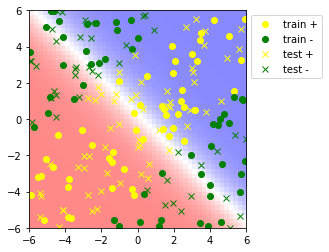

In [7]:
plot_boundaries(w1, w2, w3, w4, w5, w6, b1, b2, b3)
plot_data(X_train, y_train, X_test, y_test)

Évidemment, le classificateur n'est pas entraîné sur nos données et donc il ne les classifie pas bien. (*Rappel&nbsp;:* Ce classificateur avec des paramètres fixés à priori a un haut biaise et une petite variance.)

### Question 2
Essayez les autres ensembles de poids ci-dessous et trouvez celui qui fonctionnerait le mieux sur nos données :

In [8]:
w1 = -1; w2 = -1; w3 = -1; w4 = -1; w5 = 4; w6 = -3
b1 = -4; b2 = 4; b3 = 1

In [9]:
w1 = 1; w2 = -1; w3 = -1; w4 = -1; w5 = -4; w6 = 3
b1 = 4; b2 = -4; b3 = 2

In [10]:
w1 = -1; w2 = 2; w3 = 1; w4 = -2; w5 = 4; w6 = 4
b1 = 5; b2 = 8; b3 = -6

Évidemment, nous avons besoin d'une méthode systématique pour trouver les paramètres. Comme c'était le cas pour les modèles linéaires, nous allons apprendre les poids en *minimisant une fonction de perte (loss)*.

## Fonction de perte (loss function)

Une *fonction de perte* évalue la différence entre les prédictions de notre classificateur et les véritables cibles (en d'autres mots on peut aussi la voir comme une fonction qui évalue la qualité de notre modèle). 

La fonction de perte que nous utilisons pour notre réseau est l'entropie croisée binaire (*binary cross-entropy*). Si nous représentons notre ensemble d'entraînement avec l'ensemble $\{(X_1, y_1), \ldots, (X_n , y_n)\}$ et notre réseau de neurones par la fonction $f$, alors l'entropie croisée binaire est :

\begin{equation}
    \ell = \sum_{i=1}^n -y_i \log f(X_i) - (1-y_i) log(1-f(X_i))
\end{equation}

Il est important de noter que cette fonction d'erreur est calculée avant la frontière de décision (donc sur les valeurs de `o`). Intuitivement, ça permet de plus facilement apprendre de bons poids puisque sinon les gradients seraient souvent de 0. 

L'entropie croisée binaire est reliée à la distribution de Bernoulli (maximiser la vraisemblance sous une Bernoulli likelihood est équivalent à minimiser l'entropie croisée). **C'est la fonction de perte standard à utiliser pour les tâches de classification binaire. Pour la classification multiclasse, on utilise l'entropie croisée.**

### Question 3
Essayons d'obtenir quelques intuitions sur cette fonction de perte. 

Imaginons que notre ensemble d'entraînement ne contienne que quatre exemples, et ces valeurs pour $X, f(X), y$ comme suit:

|X|f(X)|y|
|:---|:---|:---|
|(5.4, 1.6)|1|1|
|(1.4, -0.5)|0.3679|1|
|(3.5, -3)|0.8647|0|
|(-3.5, 1.1)|0|0|

Calculez la fonction de perte en utilisant l'équation plus haut. Vous pouvez calculer le logarithme à l'aide de la fonction suivante de `numpy`:

In [14]:
np.log(0.5)

-0.6931471805599453

In [15]:
l = 0
for fx, y in [(1, 1), (0.3679, 1), (0.8647, 0), (0, 0)]:
    ... 
print(l)

3.0002048606768033


N'oubliez pas que la fonction de perte $l$ est une fonction des paramètres du réseau puisque la perte est définie en fonction des sorties du réseau. En effet, nous pouvons écrire la fonction de perte comme ça : 

\begin{equation}
    \ell(\mathbf{w}, \mathbf{b}) = \sum_{i=1}^n -y_i \log f(X_i, \mathbf{w}, \mathbf{b}) - (1-y_i) log(1-f(X_i, \mathbf{w}, \mathbf{b}))
\end{equation}

En principe, nous voulons trouver l'ensemble des paramètres $\mathbf{w}, \mathbf{b}$ pour lesquels $\ell(\mathbf{w}, \mathbf{b})$ a la plus petite valeur. Nous utiliserons la *descente du gradient* pour trouver ces valeurs.

---  

*Remarque:* Pour entraîner les modèles, il nous suffit de calculer la dérivée de la fonction de perte en fonction des paramètres. Dans le cas de la régression linéaire, une fois que nous avions posé que la dérivée doit être égale à 0,   nous avions pu isoler w pour obtenir une expression analytique $w_{ols} = (X X^\top)^{-1} X^\top y)$.

Dans le cas d'un réseau de neurones, nous ne pouvons pas isoler les w. Par contre, souvenons-nous que la dérivée nous indique la pente de la fonction. Nous pouvons donc suivre cette pente pour tenter de trouver les paramètres qui la minimisent. En pratique, ça nous donne une procédure itérative. À chaque itération, nous calculons la dérivée, nous la « suivons » et nous recommençons.  

### Minimisation par la descente du gradient

La figure ci-dessous nous montre la fonction $f(x_1, x_2) = x_1^2 + x_2^2$ :

<img src="images/descent.png" width="700">


### Question 4
Le point A sur la figure est aux coordonnées $(1, 1, 3)$. Le vecteur bleu AB pointe dans la direction $(-1, -1)$ et le vecteur vert AC pointe dans la direction $(0, -1)$. 

Imaginez que vous êtes au point $(1, 1)$ et que vous vouliez vous déplacer dans une direction qui minimise la fonction $f$. 

Avec laquelle de ces deux directions atteindrez-vous le minimum en premier : $(-1, -1)$ or $(0, -1)$?

### Question 5
Calculez le gradient de la fonction $f$ au point $(1, 1)$. Comment ce gradient est-il relié à la direction directe pour aller au minimum?

## Entraîner le réseau de neurones

Maintenant que nous avons une meilleure intuition sur la descente de gradient, on peut se demander comment l'implémenter en pratique. 

Nous allons utiliser la librairie *scikit-learn* library pour entraîner notre petit réseau. On commence par définir le réseau&nbsp;:

In [22]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(2,),
                    activation='logistic', 
                    solver='lbfgs',
                    random_state=0,
                    max_iter=500,
                    tol=1e-7)

- `hidden_layer_sizes=(2,)` indique que nous utilisons une seule couche cachée avec deux neurones
- `activation='logistic'` indique que nous utilisons la fonction d'activation sigmoïde 
(on peut ignorer les autres arguments pour l'instant). 

Avec la fonction `fit()` on peut entraîner le réseau sur nos données d'entraînement:

In [23]:
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=1e-07, validation_fraction=0.1, verbose=False,
              warm_start=False)

Une fois que notre réseau est entraîné, on peut appeler la fonction `tiny_net_parameters` pour obtenir les paramètres du réseau entraîné (`tiny_net_parameters` utilise simplement les valeurs `clf.coefs_` et `clf.intercepts_` de `scikit-learn`):

In [51]:
from utils import tiny_net_parameters
w1, w2, w3, w4, w5, w6, b1, b2, b3 = tiny_net_parameters(clf)

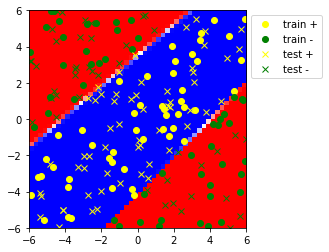

In [52]:
plot_boundaries(w1, w2, w3, w4, w5, w6, b1, b2, b3)
plot_data(X_train, y_train, X_test, y_test)

Le classificateur appris classifie bien les exemples des ensembles d'apprentissages et de tests. 


---

En plus des frontières de décisions dans l'espace original des données, nous pouvons aussi visualiser comment les données sont transformées à travers le réseau de neurones. Nous utilisons le fait que la couche cachée utilise deux neurones et donc nous pouvons visualiser sa sortie en deux dimensions. 

(pour une meilleure visibilité, les points de la classe jaune seront maintenant en bleu.)

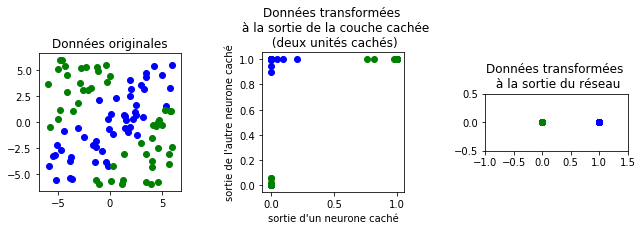

In [99]:
from utils import plot_data_transformations
plot_data_transformations(X_train, y_train, w1, w2, w3, w4, w5, w6, b1, b2, b3)

Notons que les données sont progressivement transformées pour finalement être linéairement séparables à la sortie du réseau. Dans ce cas, on imagine que l'erreur d'entraînement est de zéro. 

On peut obtenir le même rendu avec les données de test.

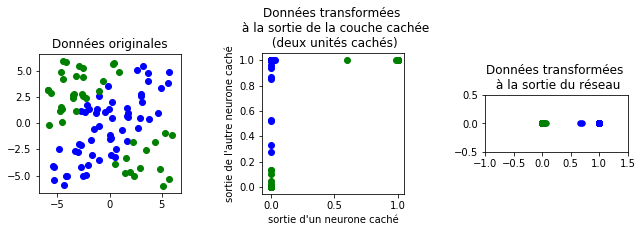

In [98]:
plot_data_transformations(X_test, y_test, w1, w2, w3, w4, w5, w6, b1, b2, b3)

Les résultats sont similaires et les données transformées sont linéairement séparables. On voit qu'elles ne sont pas aussi distancées dans la transformation finale (figure de droite).

## Question sur Tensorflow Playground

Nous allons maintenant explorer les réseaux de neurones avec un outil très visuel appelé [tensorflow playground](https://playground.tensorflow.org/). Le but est de mieux comprendre l'effet des différents hyperparamètres sur l'entraînement et la généralisation des réseaux.

Vous pouvez d'abord vous familiariser avec son interface. Ensuite, essayez de reproduire ces instructions&nbsp;:

- Utilisez une seule couche cachée
- Changez la distribution des données (*data distribution*) pour utiliser le *exclusive OR* (ou XOR)
- Lancez l'entraînement en appuyant sur *run*. Vous allez voir que le réseau va commencer à apprendre
- Arrêtez l'apprentissage après 500 epoch (une epoch consiste à procéder à une descente de gradient sur tous les exemples. Quand on utilise SGD, c'est donc plus qu'une itération de la descente de gradient.)
- En positionnant votre curseur sur les différents neurones, vous obtiendrez leur frontière de classification.

### Taux d'apprentissage (Learning rate)

Ouvrez [cet exemple](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=3&regularizationRate=0&noise=35&networkShape=1&seed=0.68448&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) sur tensorflow. 

- Lancez l'entraînement (bouton *run*) pour environ 500 epochs. Qu'observez-vous? 
- Réinitialisez le réseau (flèche *restart*). Changez le taux d'apprentissage de 3 à 0.1 et appuyez sur *run*. Laissez le réseau d'entraîner pour 500 epochs. Qu'observez-vous?   

- Refaites l'entraînement avec les trois taux d'apprentissage suivant&nbsp; 0.3, 0.03 et 0.003
 + Appuyez sur le bouton *reset*
 + Changez le taux d'apprentissage
 + Appuyez sur le bouton *step* (à droite du bouton *run*) quelques fois et observez comment les erreurs d'entraînement et de test changent à chaque étape. 

Selon vos observations, quel taux d'apprentissage devriez-vous utiliser?

### Régularisation

Utilisez [cet exemple](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=50&networkShape=4,4&seed=0.64895&showTestData=false&discretize=false&percTrainData=10&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

Avant de lancer l'entraînement, prenez un moment pour inspecter l'ensemble de test (à droite de l'écran, il y a l'option *Show test data*). Comme vous pouvez le voir, les données sont bruitées, de plus le nombre de données d'entraînement est petit. Cette situation est parfaite pour le surentraînement. (Vous pouvez enlever l'option *Show test data*.)

- Appuyez sur le bouton *run* et laissez le réseau s'entraîner pour 500 epochs avant d'arrêter l'entraînement.
- Que pensez-vous de la frontière de décision trouvée par le réseau? 
- Quelle est la cause de la différence entre les courbes d'entraînement et de test? (Vous pouvez réutiliser l'option *Show test data*)
- Prenez note de l'erreur de test

Explorons comment limiter le surentraînement avec une régularisation $L_2$. 
- Appuyez sur *restart*
- Changez la *regularization* de *None* à *L2*
- Changez *Regularization rate* de 0 à 0.3
- Lancez l'entraînement (appuyez sur *run*) pour environ 500 epochs
- Qu'observez-vous par rapport à l'expérience précédente?
- Notez l'erreur de test

Comme le taux d'apprentissage, différents taux de régularisation vont affecter la performance d'entraînement. 

Relancez l'entraînement avec ces taux de régularisation 0.03 et 0.003:
- Appuyez sur *restart*
- Changez le *Regularization rate*
- Appuyez sur *run* et laissez le modèle s'entraîner pour environ 500 epochs
- Notez l'erreur de test

Quel taux de régularisation utiliseriez-vous? 